<h3>Implementation of "Addessing the Curse of Imbalanced Training Sets: One-Sided Selection"</h3>

In [50]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from scipy.stats import mode
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def plot_data(X,y, title = ""):
    x_1 = [sample[0] for sample in X]
    x_2 = [sample[1] for sample in X]
    df = pd.DataFrame()
    df['x_1']=x_1
    df['x_2']=x_2
    df['y']=y
    sns.lmplot(x='x_1', y='x_2', data=df, hue='y', fit_reg = False)
    ax = plt.gca()
    ax.set_title(title)

In [114]:
def TomekLinkSelection(X, y, metric='l2', random_state = 0):
    if(mode(y)[0][0]==0):
        minority = 1
    else:
        minority = 0
        
    sample_index = []
    positive_index = []
    for index, y_value in enumerate(y):
        if(y_value==minority):
            positive_index.append(index)
    sample_index = positive_index
    while True:
        random_negative_index = random.randint(0, len(y)-1)
        if(random_negative_index not in sample_index):
            sample_index.append(random_negative_index)
            break
   
    training_samples_X = [X[index] for index in sample_index]
    training_samples_y = [y[index] for index in sample_index]
    plot_data(training_samples_X,training_samples_y, title="Positive Example w/ One Negative Example")
    
    
    
    misclassified_index = []
    KN_clf = KNeighborsClassifier(n_neighbors=1)
    KN_clf.fit(training_samples_X,  training_samples_y)
    KN_clf_pred =  KN_clf.predict(X)
    for index, result in enumerate(KN_clf_pred):
        if(y[index]!=result):
            misclassified_index.append(index)

    C = sample_index + misclassified_index
    
    C_X = [X[index] for index in C]
    C_y = [y[index] for index in C]
    plot_data(C_X,C_y, title="Previous Graph with Misclassified Data Points")
    
    
    kneighbor = NearestNeighbors(n_neighbors=2)
    kneighbor.fit(X)
    kneighbors = [neighbor[1] for neighbor in kneighbor.kneighbors(X)[1]]
    
    
    tomek_link_index = []
    print(kneighbors)
    for index, neighbor_index in enumerate(kneighbors):
        if(kneighbors[neighbor_index] == index and y[neighbor_index] != y[index]):
            tomek_link_index.append(index)
    print(tomek_link_index)
    X_T = [X[index] for index in C if (index in positive_index or index not in tomek_link_index)]
    y_T = [y[index] for index in C if (index in positive_index or index not in tomek_link_index)]

    return X_T, y_T

In [124]:
number_of_entry = 120
X = [[random.gauss(2,0.5),random.gauss(2,0.5)] for i in range(int(number_of_entry/8)) ]
X += [[random.gauss(2.5,0.5),random.gauss(2.5,0.5)] for i in range(int(7*number_of_entry/8))]
y = [0 if i >=number_of_entry/8 else 1 for i in range(number_of_entry)]

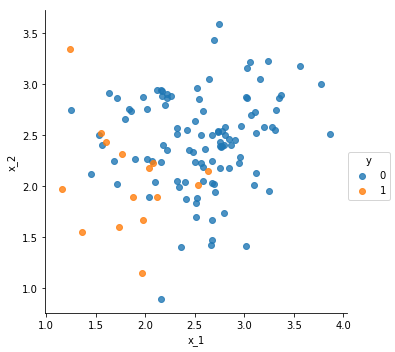

In [125]:
plot_data(X,y)

[26, 60, 114, 72, 24, 20, 9, 60, 6, 60, 21, 89, 11, 42, 84, 81, 98, 50, 80, 46, 72, 31, 47, 33, 4, 15, 0, 11, 86, 103, 43, 21, 41, 43, 73, 38, 104, 80, 35, 71, 16, 54, 94, 30, 102, 84, 19, 22, 61, 108, 51, 50, 75, 110, 96, 112, 36, 68, 113, 73, 7, 77, 88, 113, 105, 1, 7, 81, 106, 89, 69, 39, 3, 59, 111, 52, 98, 61, 110, 54, 37, 15, 53, 109, 14, 37, 28, 93, 62, 11, 86, 102, 111, 55, 42, 94, 105, 118, 16, 78, 59, 71, 44, 29, 36, 43, 68, 52, 49, 83, 78, 74, 55, 63, 2, 90, 71, 87, 97, 38]
[0, 2, 3, 4, 7, 11, 14, 24, 26, 60, 72, 84, 89, 114]


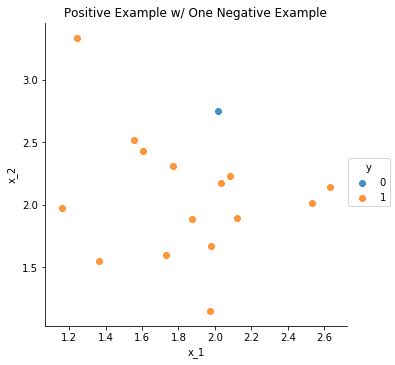

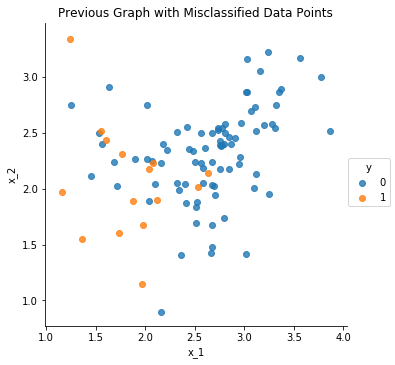

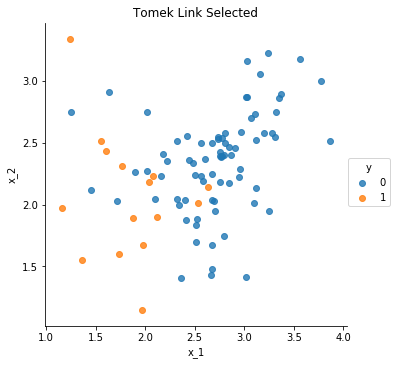

In [127]:
X_T, y_T = TomekLinkSelection(X, y)
plot_data(X_T,y_T, "Tomek Link Selected")